In [167]:
import cv2
import numpy as np 
from skimage import measure
import imutils
from imutils import contours
from matplotlib import pyplot as plt 

In [203]:
img = cv2.imread("C:/Users/Sahil/Desktop/Posture/back.jpg")
x1 = int(225/2-15)
x2 = int(225/2+15)
img = img[:, x1:x2]
color = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img,(5,5),0)

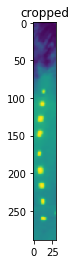

In [207]:
plt.imshow(img)
plt.title('cropped')
plt.show()

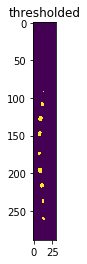

In [199]:
ret,img = cv2.threshold(img,230,255,cv2.THRESH_BINARY)
plt.imshow(img)
plt.title('thresholded')
plt.show()

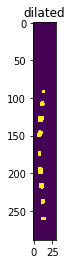

In [184]:
img  = cv2.dilate(img, None, iterations=1)
plt.imshow(img)
plt.title('dilated')
plt.show()

In [185]:
labels = measure.label(img, neighbors=8, background=0)
mask = np.zeros(img.shape, dtype="uint8")

for label in np.unique(labels):
    if(label==0):
        continue
        
    labelMask = np.zeros(img.shape, dtype="uint8")
    labelMask[labels==label] = 255
    numPixels = cv2.countNonZero(labelMask)
    
    if(numPixels>0):
        mask = cv2.add(mask, labelMask)

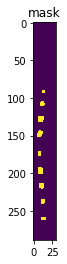

In [186]:
plt.imshow(img)
plt.title('mask')
plt.show()

In [187]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]

In [188]:
average_height = []
average_width = []
for cnt in cnts:
    sum1 = 0
    sum2 = 0
    for point in cnt:
        sum1=sum1+point[0][1]
        sum2 = sum2 + point[0][0]
    average_height.append(sum1/len(cnt))
    average_width.append(sum2/len(cnt))  


left_most = []
for cnt in cnts:
    left = cnt[0][0][0]
    for point in cnt:
        if(point[0][0]<left):
            left = point[0][0]
    left_most.append(left)
    
lm = left_most.index(min(left_most))
print(lm)
        

    

0


In [189]:
high = average_height.index(max(average_height))
low = average_height.index(min(average_height))
left = average_width.index(min(average_width))
i = [high, low]
print(low)

8


In [193]:
(x, y, w, h) = cv2.boundingRect(cnts[high])
((cX, cY), radius) = cv2.minEnclosingCircle(cnts[high])
color = cv2.circle(color, (int(cX), int(cY)), int(radius),(255, 0, 0), 3)

(x, y, w, h) = cv2.boundingRect(cnts[low])
((cX, cY), radius) = cv2.minEnclosingCircle(cnts[low])
color = cv2.circle(color, (int(cX), int(cY)), int(radius),(255, 0, 0), 3)

(x, y, w, h) = cv2.boundingRect(cnts[lm])
((cX, cY), radius) = cv2.minEnclosingCircle(cnts[left])
color = cv2.circle(color, (int(cX), int(cY)), int(radius),(255, 0, 0), 3)


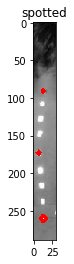

In [194]:
plt.imshow(color)
plt.title('spotted')
plt.show()